# Chapter One: Why Python?

Python is:
* Open source
* Interpreted
* Multiparadigm - OOP, functional programming, procedural programming
* Multipurpose  - can be used for low-level systems as well as for high-level analytiscs tasks
* Cross-platform
* Dynamically typed
* Indentation aware
* Garbage collecting - avoiding the need for the programmers to manage memory

### The Scientifisc Stack:
* Numpy
* Scipy
* matplotlib
* pandas
* scikit-learn
* PyTables

## Valuation of european call option by  Monte Carlo simulation

In [3]:
import math
import numpy as np

S0 = 100 #initial stock index level
K = 105  #strike price of the european call option
T = 1.0  #time to maturity (1 year)
r = 0.05 #constant, riskless short rate
sigma = 0.2  #constant volatility
I = 100000   # number of simulations
np.random.seed(1000)

In [8]:
# Valuation algorithm
z = np.random.standard_normal(I)   #pseudo-random numbers
# index values at maturity
ST = S0 *np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z)
hT = np.maximum(ST - K, 0)      # payoff at maturity
C0 = math.exp(-r * T) * np.mean(hT)   # Monte Carlo estimator

In [9]:
# Result Output
print('Value of the European call option: {:5.3f}.'.format(C0))

Value of the European call option: 7.958.


## S&P 500 annualized volatility

In [15]:
import numpy as np
import pandas as pd
import pylab
from pylab import plt
import matplotlib as mpl

In [20]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [38]:
data = pd.read_csv('sp500_daily.csv', index_col=0, parse_dates=True)
data = pd.DataFrame(data['Adj Close'])
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23173 entries, 1927-12-30 to 2020-04-02
Data columns (total 1 columns):
Adj Close    23173 non-null float64
dtypes: float64(1)
memory usage: 362.1 KB


In [41]:
data['rets'] = np.log(data / data.shift(1))
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)

/home/babel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/babel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


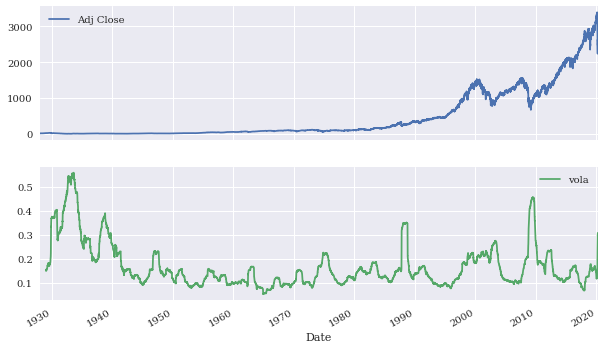

In [43]:
data[['Adj Close', 'vola']].plot(subplots=True, figsize=(10,6));

## Idioms and Paradigms

In [46]:
import math
loops = 2500000
a = range(1, loops)
def f(x):
    return 3 * math.log(x) + math.cos(x) ** 2
%timeit r = [ f(x) for x in a]

1.07 s ± 7.32 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [47]:
import numpy as np
a = np.arange(1, loops)
%timeit r = 3* np.log(a) * np.cos(a) **2

91.2 ms ± 604 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [49]:
import numexpr as ne

ne.set_num_threads(1)
f = '3 * log(a) + cos(a) ** 2'
%timeit r = ne.evaluate(f)

29.3 ms ± 328 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
ne.set_num_threads(4)
%timeit r = ne.evaluate(f)

9.4 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Data-Driven and AI-First Finance

In [70]:
import numpy as np
import pandas as pd

In [71]:
data = pd.read_csv('AAPL.csv', index_col=0, parse_dates=True)
data = pd.DataFrame(data['Adj Close'])
data['Returns'] = np.log(data / data.shift())   #calculate the log returns over the complete history
data.dropna(inplace=True)

In [72]:
lags = 6

In [73]:
cols = []
for lag in range(1, lags +1):
    col = 'lag_{}'.format(lag)
    data[col] = np.sign(data['Returns'].shift(lag))  #generate DataFrame columns with directional lagged log return data
    cols.append(col)
    data.dropna(inplace=True)

In [74]:
from sklearn.svm import SVC
model = SVC(gamma='auto')  #instantiates the model object
model.fit(data[cols], np.sign(data['Returns']))  #fits the model, given the features and the label data(all directional)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
data['Prediction'] = model.predict(data[cols])   #uses fitted model to create the prediction(in-sample) which are the position of the trading strategy at the same time (long or short)

In [76]:
data['Strategy'] = data['Prediction'] * data['Returns']  #calculates the log returns of the strategy

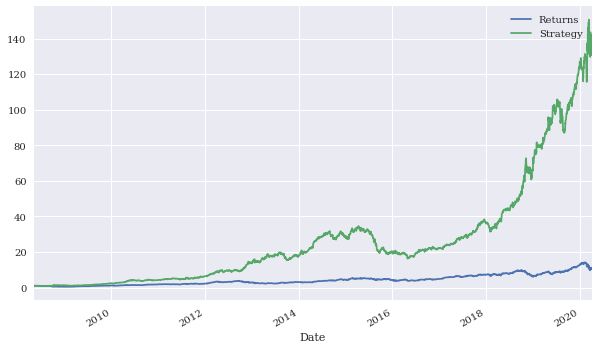

In [78]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));  #plots the performance

# Further resources
* Hilpisch, Yves (2015). *Derivatives Analytics with Python*
* Lopez de Prado, Marcos (2018). *Advances in Financial Machine Learning*
* VanderPlas, Jake (2016). *Python Data Science Handbook*
